In [1]:
# Reference: https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/

In [53]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.datasets import boston_housing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [55]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [56]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)

In [57]:
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, x_train, y_train, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -21.54 (7.87) MSE


In [58]:
# evaluate model with standardized dataset
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, x_train, y_train, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: -22.24 (9.86) MSE


In [59]:
# define the model
def larger_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [60]:
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, x_train, y_train, cv=kfold)
print("Larger: %.2f (%.2f) MSE" % (results.mean(), results.std()))


Larger: -16.61 (8.61) MSE


In [61]:
# define wider model
def wider_model():
    # create model
    model = Sequential()
    model.add(Dense(20, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [62]:
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=wider_model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, x_train, y_train, cv=kfold)
print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Wider: -12.61 (6.83) MSE


In [63]:
model = wider_model()

In [69]:
np.random.seed(seed)
scaler = StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
model_wider = model.fit(x_train_scaled, 
                        y_train, epochs=500, verbose=0,
                       validation_split=0.25)

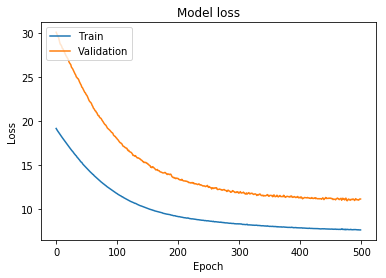

In [70]:
# Plot training & validation loss values
plt.plot(model_wider.history['loss'])
plt.plot(model_wider.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [71]:
from sklearn.metrics import mean_squared_error

x_test_scaled = scaler.transform(x_test)

print("Wider Test: %.2f MSE" % mean_squared_error(
    model.predict(x_test_scaled), y_test))

Wider Test: 18.69 MSE


In [72]:
model.save('./Wider_DNN_for_Regression.h5')